In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
# from scipy.signal import convolve2d 
%matplotlib inline

In [39]:
# # 遅い。一番愚直な書き方
# def convolve2d(X, W):
#     t0 = datetime.now()
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in range(n1 + m1 - 1):
#         for ii in range(m1):
#             for j in range(n2 + m2 - 1):
#                 for jj in range(m2):
#                     if i >= ii and j >= jj and i - ii < n1 and j - jj < n2:
#                         Y[i,j] += W[ii,jj]*X[i - ii,j - jj]
    
#     return Y

## 高速化したやつ
# def convolve2d(X, W):
#     t0 = datetime.now()
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in range(n1):
#         for j in range(n2):
#             Y[i:i+m1,j:j+m2] += X[i,j]*W
#     print("elapsed time:", (datetime.now() - t0))
#     return Y

# インプットと同じサイズ
def convolve2d(X, W):
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    ret = Y[int(m1/2):-int(m1/2)+1,int(m2/2):-int(m2/2)+1]
    assert(ret.shape == X.shape)
    return ret

# # インプットより小さいサイズ
# def convolve2d(X, W):
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in range(n1):
#         for j in range(n2):
#             Y[i:i+m1,j:j+m2] += X[i,j]*W
#     ret = Y[m1-1:-m1+1,m2-1:-m2+1]
#     return ret

In [40]:
img = mpimg.imread('../datasets/lena.png')

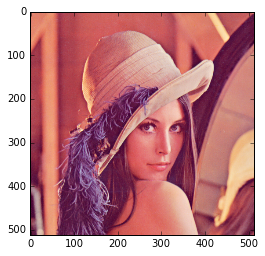

In [41]:
plt.imshow(img)

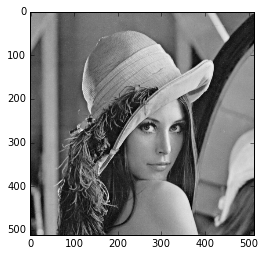

In [42]:
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')

In [43]:
# gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

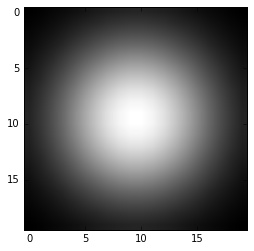

In [44]:
plt.imshow(W, cmap='gray')

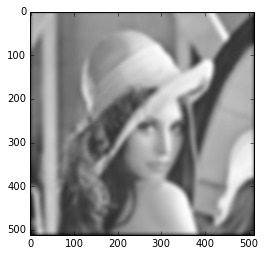

In [45]:
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')

In [46]:
print(out.shape)

(512, 512)
